#### **Análisis inscripción de estudiantes graduados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer características**

In [5]:
enrollment_features = df.loc[df['Target']=='Graduate',['Application mode','Application order','Course','Daytime/evening attendance',
                                                      'Previous qualification']]

In [7]:
enrollment_features.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,5.824808,1.851064,9.959258,0.909009,2.226799
std,5.200300,1.395516,4.109811,0.287662,3.680108
min,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,6.000000,1.000000,1.000000
50%,4.000000,1.000000,11.000000,1.000000,1.000000
75%,9.000000,2.000000,12.000000,1.000000,1.000000
max,18.000000,6.000000,17.000000,1.000000,17.000000


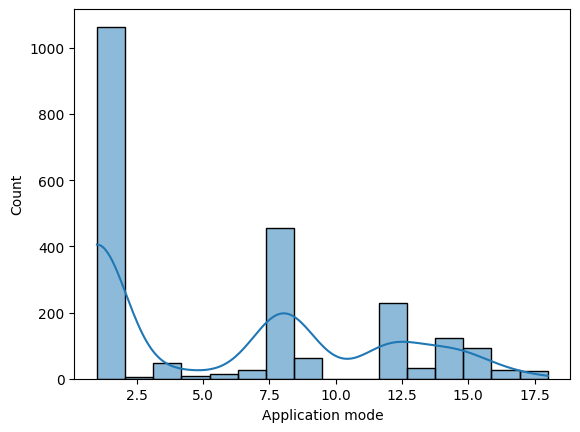

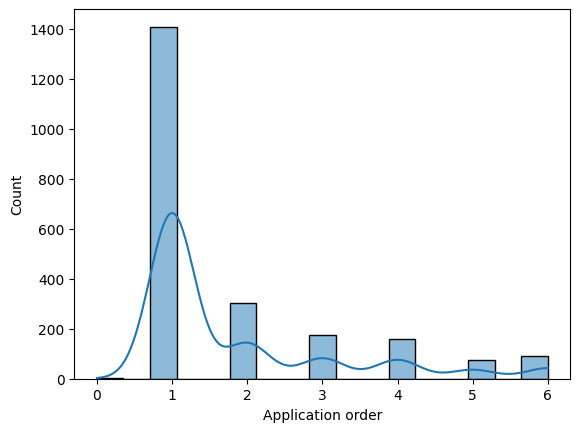

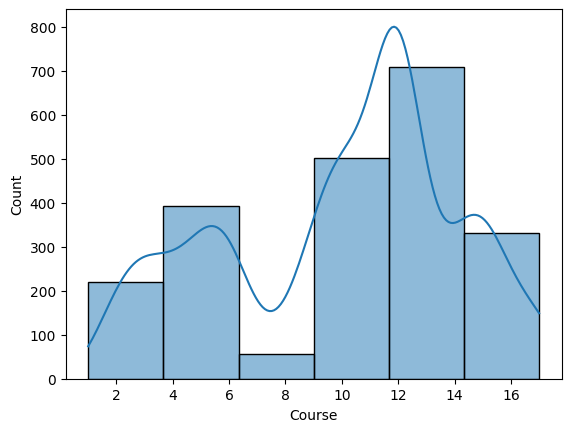

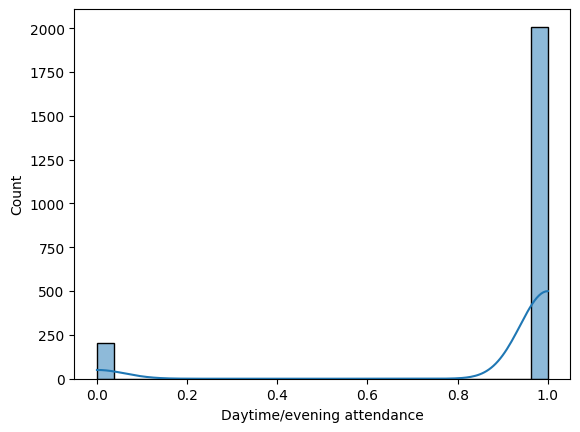

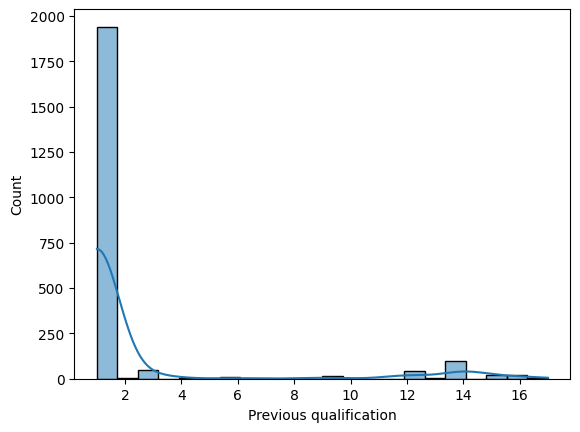

In [6]:
for i in enrollment_features.columns:
    sns.histplot(data=enrollment_features, x=i, kde=True, bins=len(i))
    plt.show()

Observaciones:
- La mayoría de estudiantes que se graduaron, se inscribieron en la 1º fase de contingencia general.
- El orden de inscripción fue el primero (prioritario).
- Los cursos mas demandados fueron turismo y enfermería.
- La mayoría esta en turno diurno.
- La cualificación previa de los estudiantes es la educación secundaria.

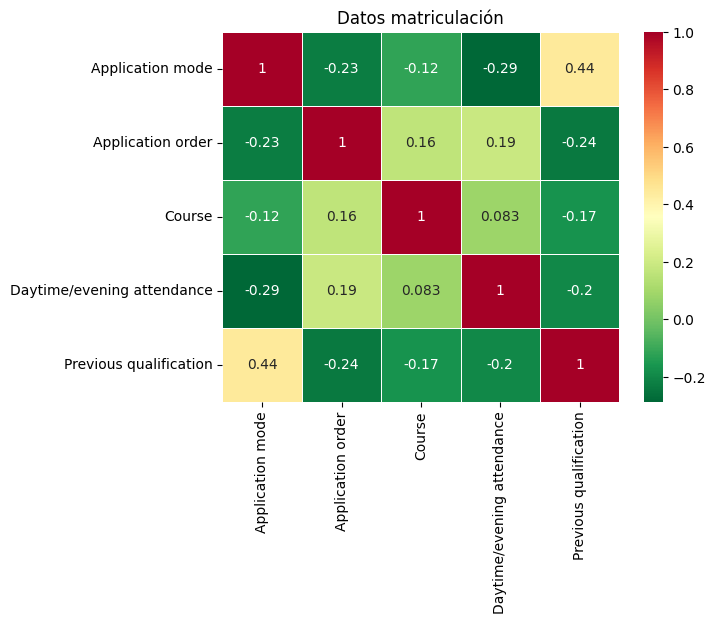

In [8]:
# Mapa de correlaciones entre caractersticas
enrollment_corr = enrollment_features.corr(method='spearman')
#mask = np.triu(np.ones_like(enrollment_corr, dtype=bool))
sns.heatmap(data=enrollment_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos matriculación')
plt.show()

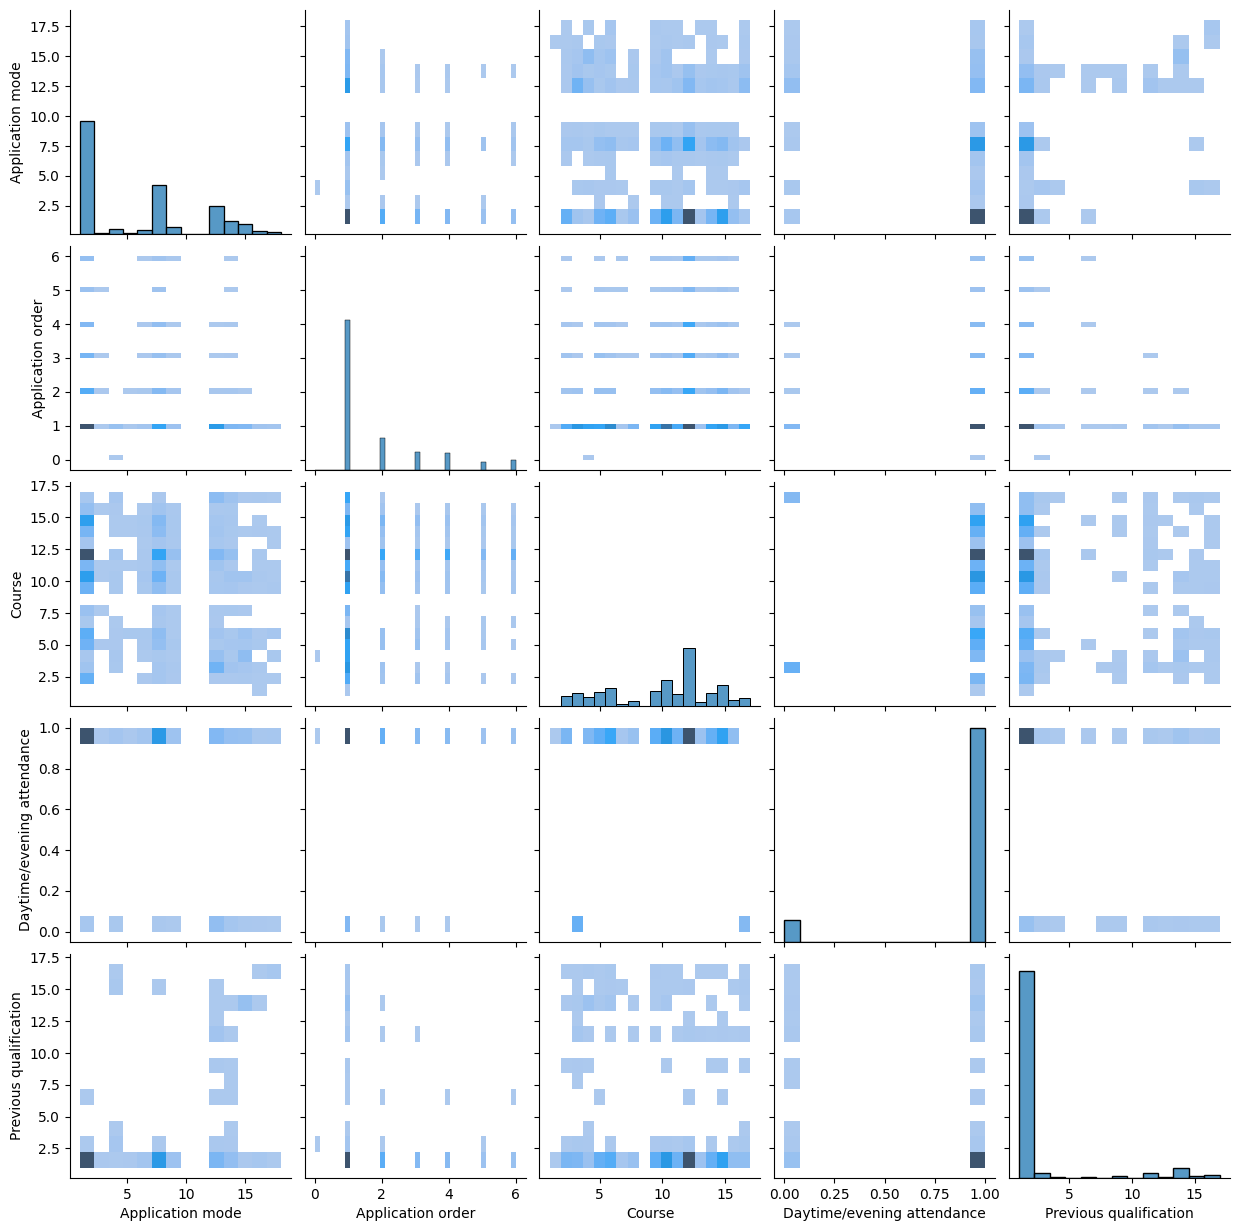

In [9]:
sns.pairplot(enrollment_features, kind='hist')

<Axes: xlabel='Application mode', ylabel='Previous qualification'>

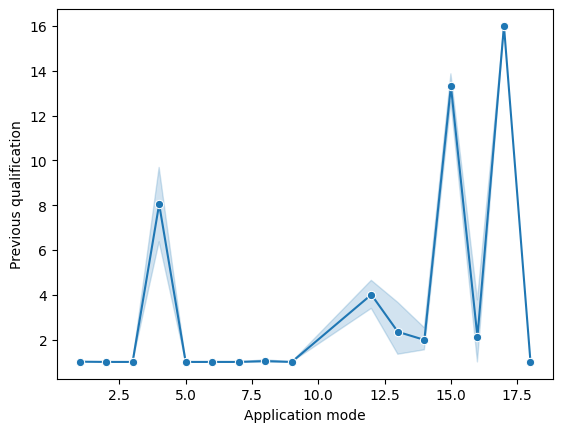

In [10]:
sns.lineplot(data=enrollment_features, x='Application mode',y='Previous qualification', marker='o')

Observamos como en lo referente al modo de inscribirse encontramos una relacion positiva con la cualificación previa del estudiante. Tiene sentido ya que diferentes titulos ayudan a acceder mediante diferentes vías (inscripciones) a los cursos/formaciones requeridas.


<Axes: xlabel='Application mode', ylabel='Application order'>

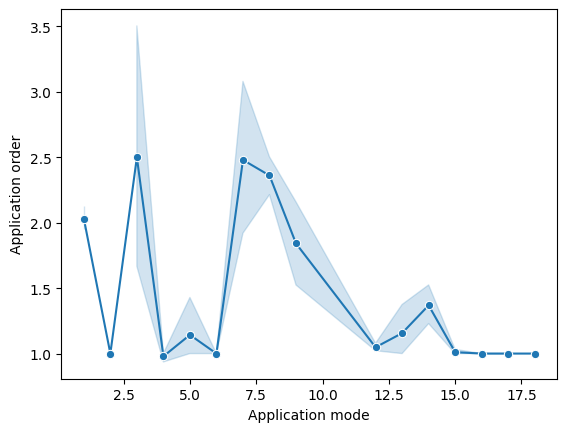

In [11]:
sns.lineplot(data=enrollment_features, x='Application mode',y='Application order',marker='o')

Las inscripciones fuera de la 1º fase general (más escogida), tienden a presentar un mayor numero de orden en su aplicación. Tal vez debido a la imposibilidad frente a inscripciones prioritarias.

<Axes: xlabel='Application order', ylabel='Previous qualification'>

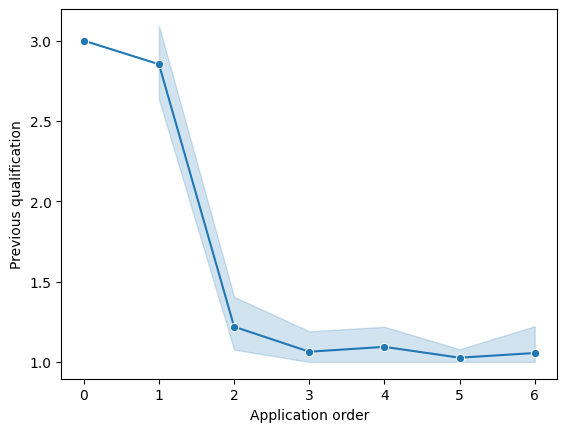

In [12]:
sns.lineplot(data=enrollment_features, x='Application order',y='Previous qualification',marker='o')

Los estudiantes con educaciones previas al ingreso de un mayor nivel (grados,masters,etc) tienden a presentar su matriculación como primera opción y ser aceptados.
En cambio, los de menor cualificación, necesitan de más intentos (órdenes) para ser aceptados.